In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('thedataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.528169,0.751558,-8.500000e-07,0.438499,0.670550,-0.012420,0.395904,0.544991,-0.014329,0.380105,...,0.592657,0.470643,-0.045323,0.572114,0.536496,-0.026737,0.578367,0.562970,-0.006884,A
1,0.566986,0.784178,-9.100000e-07,0.471936,0.682928,-0.017493,0.430715,0.550965,-0.024315,0.412029,...,0.655957,0.476536,-0.050478,0.624769,0.541335,-0.028249,0.623685,0.574726,-0.006422,A
2,0.611351,0.816964,-1.050000e-06,0.516094,0.706861,-0.015911,0.472323,0.563737,-0.022967,0.454225,...,0.713345,0.490519,-0.063652,0.682194,0.562760,-0.039012,0.679816,0.596180,-0.014920,A
3,0.657960,0.809100,-9.040000e-07,0.569685,0.707656,-0.022884,0.526954,0.575972,-0.035635,0.508380,...,0.759740,0.510618,-0.060662,0.731810,0.578309,-0.037702,0.727891,0.608349,-0.015311,A
4,0.670085,0.780062,-8.130000e-07,0.590681,0.683798,-0.017477,0.553290,0.565117,-0.025763,0.536578,...,0.758560,0.507238,-0.046437,0.735496,0.565314,-0.026548,0.729930,0.594148,-0.007326,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,0.363890,0.638092,9.090000e-07,0.374439,0.562789,-0.034994,0.420362,0.511353,-0.056122,0.466874,...,0.520606,0.666741,-0.109985,0.472603,0.661772,-0.116705,0.434632,0.649654,-0.113267,H
9351,0.366935,0.645973,9.250000e-07,0.381186,0.572905,-0.032804,0.426936,0.525072,-0.054243,0.473475,...,0.517710,0.686424,-0.113961,0.472486,0.677324,-0.119877,0.436808,0.662481,-0.116453,H
9352,0.368109,0.652003,8.700000e-07,0.383304,0.579845,-0.033585,0.432639,0.535593,-0.054662,0.480191,...,0.531183,0.695551,-0.108231,0.485764,0.685649,-0.115042,0.448903,0.669388,-0.112674,H
9353,0.385040,0.669350,9.200000e-07,0.397125,0.596668,-0.046174,0.446771,0.556227,-0.070428,0.497662,...,0.542884,0.721826,-0.107126,0.497616,0.713421,-0.112859,0.463011,0.697658,-0.107707,H


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9048 non-null   float64
 1   1       9048 non-null   float64
 2   2       9048 non-null   float64
 3   3       9048 non-null   float64
 4   4       9048 non-null   float64
 5   5       9048 non-null   float64
 6   6       9048 non-null   float64
 7   7       9048 non-null   float64
 8   8       9048 non-null   float64
 9   9       9048 non-null   float64
 10  10      9048 non-null   float64
 11  11      9048 non-null   float64
 12  12      9048 non-null   float64
 13  13      9048 non-null   float64
 14  14      9048 non-null   float64
 15  15      9048 non-null   float64
 16  16      9048 non-null   float64
 17  17      9048 non-null   float64
 18  18      9048 non-null   float64
 19  19      9048 non-null   float64
 20  20      9048 non-null   float64
 21  21      9048 non-null   float64
 22  

In [4]:
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)

In [5]:
df.shape

(9048, 64)

In [6]:
X = df[df.columns[0:63]]
print("Features shape =", X.shape)

Y = df[df.columns[-1]]
print("Labels shape =", Y.shape)

Features shape = (9048, 63)
Labels shape = (9048,)


In [7]:
# from sklearn.model_selection import train_test_split

# train_size = 0.7
# val_size = 0.15
# test_size = 0.15

# X_train, X_, y_train, y_ = train_test_split(
#     X, y, train_size=train_size, stratify=y)

# print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
#        f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")





NameError: name 'y' is not defined

In [45]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X, Y, train_size=0.8,random_state=42,stratify = Y)

# print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
#       f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
#       f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.26, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.2)

In [41]:
X_val.shape

(7238, 63)

In [42]:
y_pred = svm.predict(x_test)
y_pred

array(['W', 'G', 'A', ..., 'D', 'F', 'A'], dtype=object)

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9900552486187846, 0.9900552486187846, 0.9900552486187846)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

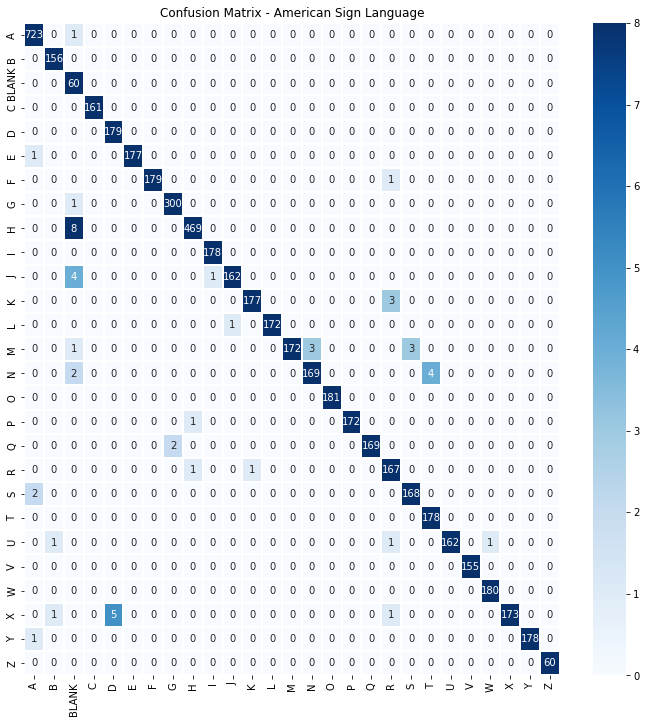

In [ ]:
labels = sorted(list(set(Y.to_list())))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('new-model-1-stratified.pkl','wb') as f:
    pickle.dump(svm,f)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt



knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X,Y)
 

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9790016577638607, 0.9790016577638607, 0.9790016577638607)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

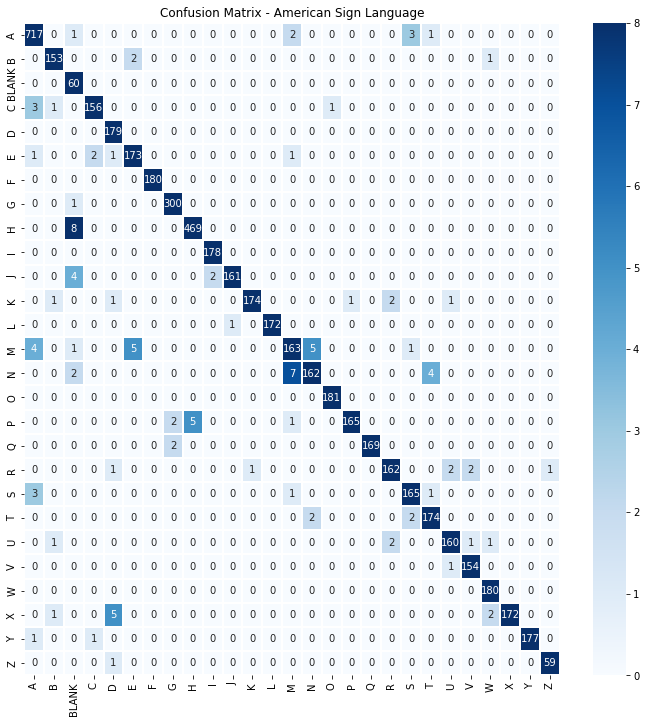

In [ ]:
labels = sorted(list(set(Y.to_list())))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('kmeans-new-model.pkl','wb') as f:
    pickle.dump(knn,f)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=150,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
classifier_rf.score(X_test,y_test)

0.9837937384898711

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9837937384898711, 0.9837937384898711, 0.9837937384898711)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

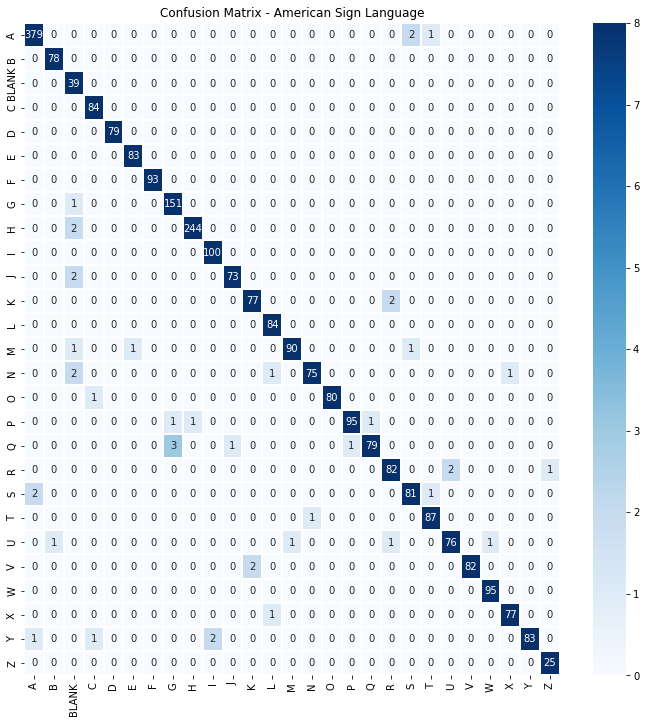

In [ ]:
labels = sorted(list(set(Y.to_list())))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping